# Exercise 2 – Determining the spreading of epidemics

### Federico Agostini, Federico Bottaro, Gianmarco Pompeo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx

In [2]:
# create adjacency matrix for network A
index_i_A, index_j_A = np.loadtxt("net1.txt", dtype=np.int16, unpack=True)
dim = max(index_i_A.max(), index_j_A.max())+1
NetA_matrix = np.zeros((dim, dim))
for i,j in zip(index_i_A, index_j_A):
    # the adjacency matrix needs to be symmetric
    NetA_matrix[i, j] = 1
    NetA_matrix[j, i] = 1

In [3]:
# create adjacency matrix for network B
index_i_B, index_j_B = np.loadtxt("net2.txt", dtype=np.int16, unpack=True)
dim = max(index_i_B.max(), index_j_B.max())+1
NetB_matrix = np.zeros((dim, dim))
for i,j in zip(index_i_B, index_j_B):
    # the adjacency matrix needs to be symmetric
    NetB_matrix[i, j] = 1
    NetB_matrix[j, i] = 1

In [4]:
NetA = nx.from_numpy_array(NetA_matrix)
NetB = nx.from_numpy_array(NetB_matrix)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


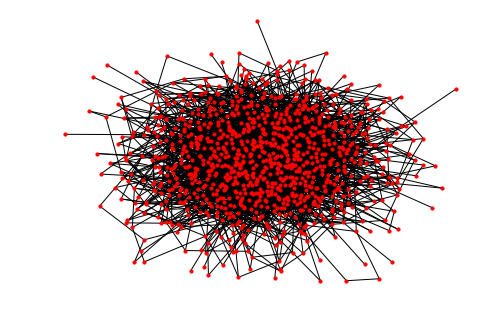

In [5]:
nx.draw(NetA, node_size=10)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


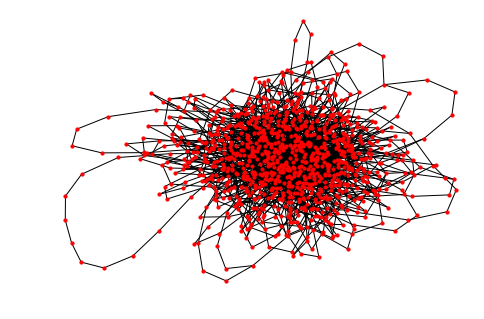

In [6]:
nx.draw(NetB, node_size=10)

## Task 1
Using the two networks provided in (A), calculate the epidemic threshold in the **SIS** dynamics for the homogenous, heterogenous and quenched mean-field approximations for $\mu=0.5$

In [7]:
# Preliminaries

mu = 0.5

## Average degree

### Network A
node_deg = NetA.degree()
node_deg = list(node_deg)
NetA_degree = np.array([x[1] for x in node_deg])
NetA_average_degree   = NetA_degree.mean() # <k_A>
NetA_average_degree_2 = np.mean(np.power(NetA_degree, 2)) # <(k_A)**2>
NetA_max_eigenvalue = np.max(np.real(np.linalg.eig(NetA_matrix)[0]))
print(NetA_max_eigenvalue)

### Network B
node_deg = NetB.degree()
node_deg = list(node_deg)
NetB_degree = np.array([x[1] for x in node_deg])
NetB_average_degree   = NetB_degree.mean() # <k_B>
NetB_average_degree_2 = np.mean(np.power(NetB_degree, 2)) # <(k_B)**2>
NetB_max_eigenvalue = np.max(np.real(np.linalg.eig(NetB_matrix)[0]))
print(NetB_max_eigenvalue)

6.284102805703304
7.530166187718354


In [8]:
# Homogeneus MF
NetA_lambda_MF = mu/NetA_average_degree
NetB_lambda_MF = mu/NetB_average_degree
print("HOMOGENEOUS MF")
print("Lambda_A =", NetA_lambda_MF)
print("Lambda_B =", NetB_lambda_MF)

HOMOGENEOUS MF
Lambda_A = 0.0971628449280995
Lambda_B = 0.13919821826280623


In [9]:
# Heterogeneous MF
NetA_lambda_HMF = mu*NetA_average_degree/NetA_average_degree_2
NetB_lambda_HMF = mu*NetB_average_degree/NetB_average_degree_2
print("HETEROGENEUOS MF")
print("Lambda_A =", NetA_lambda_HMF)
print("Lambda_B =", NetB_lambda_HMF)

HETEROGENEUOS MF
Lambda_A = 0.08160482080558198
Lambda_B = 0.07587663709336713


In [10]:
# Quenched MF
NetA_lambda_QMF = mu/NetA_max_eigenvalue
NetB_lambda_QMF = mu/NetB_max_eigenvalue
print("QUENCHED MF")
print("Lambda_A =", NetA_lambda_QMF)
print("Lambda_B =", NetB_lambda_QMF)

QUENCHED MF
Lambda_A = 0.07956585298798928
Lambda_B = 0.06639959697244084


## Task 2
Implement the (stochastic) SIS model in the two networks and simulate the entire phase diagram for $\mu=0.5$. Compare the three theoretical thresholds with the numerical results. 

*Suggestion: you need to simulate many (e.g. 100) simulations for each network and compare mean and std with the different analytical approximations.*

$$a_1 = \mu I$$
$$a_2 = \lambda n\,,$$ where $n$ is the number of links S -- I

In [11]:
np.random.seed(20190410)

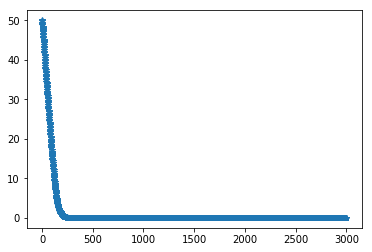

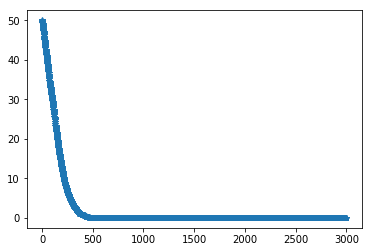

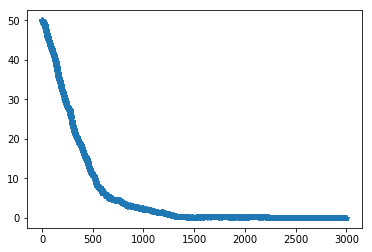

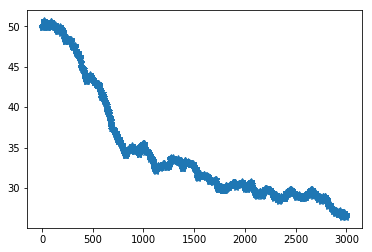

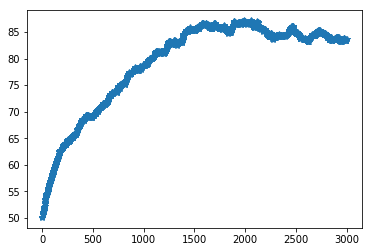

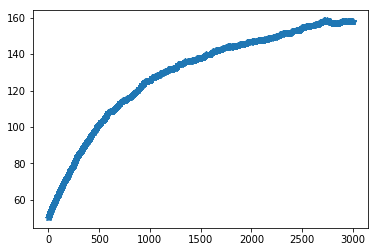

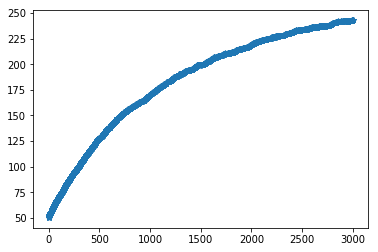

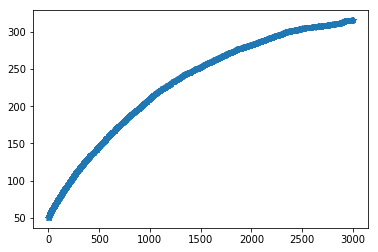

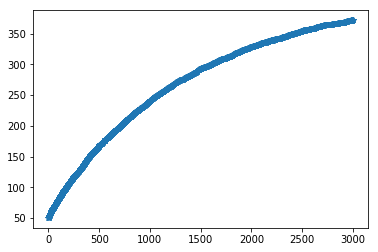

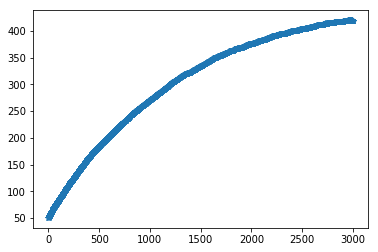

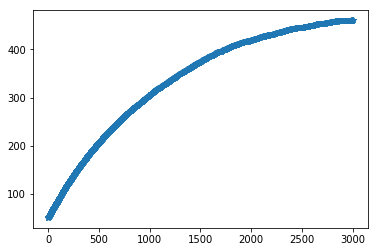

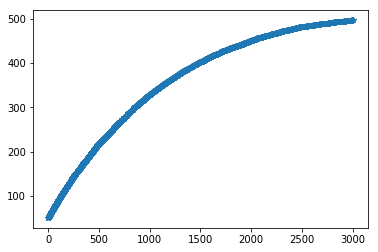

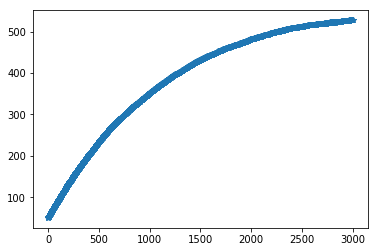

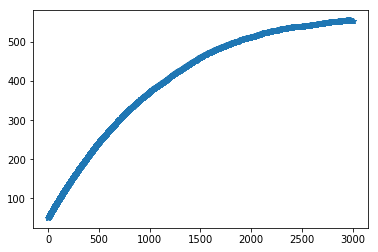

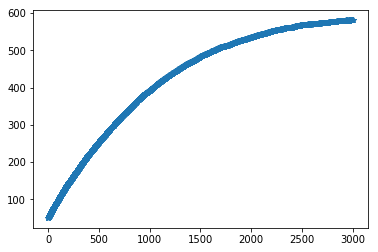

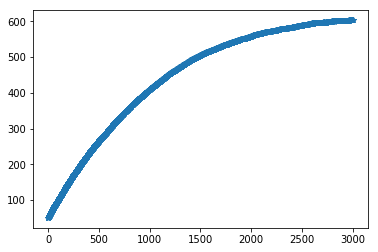

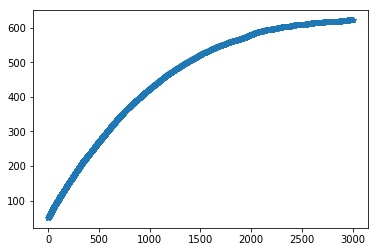

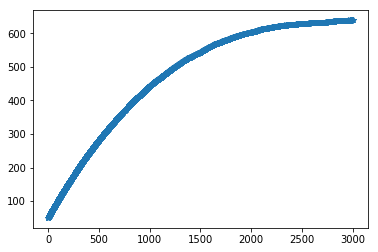

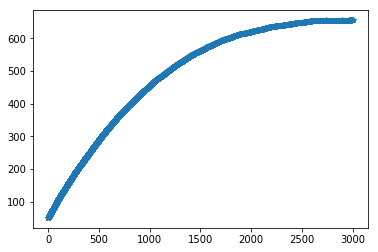

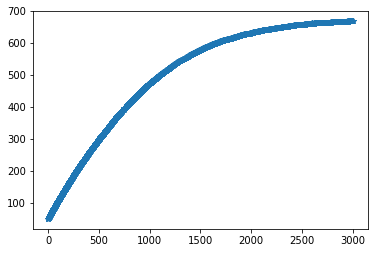

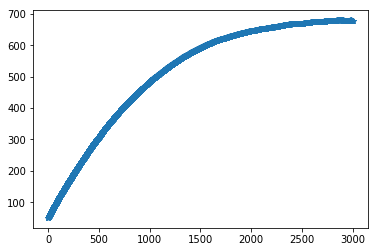

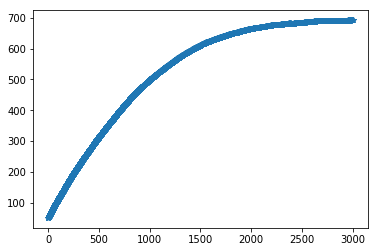

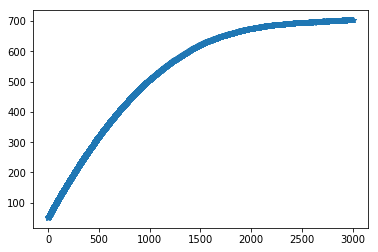

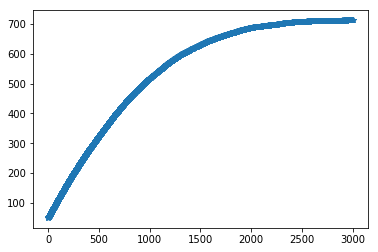

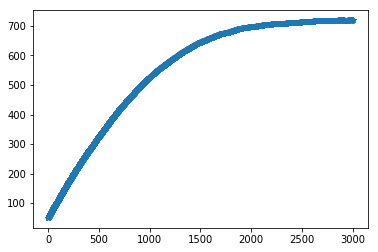

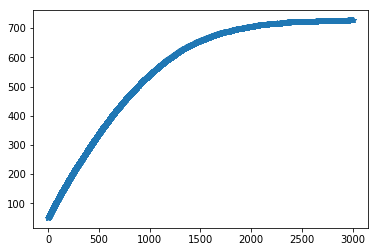

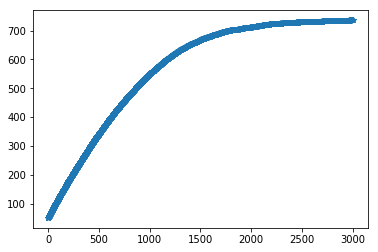

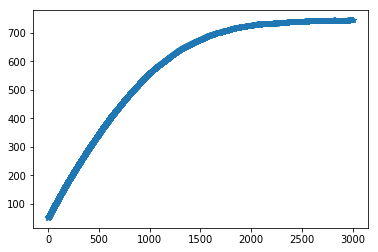

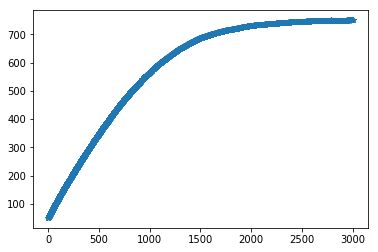

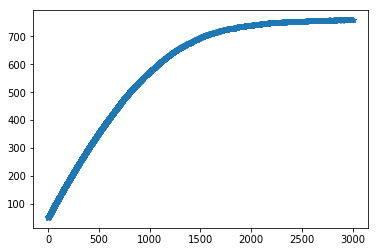

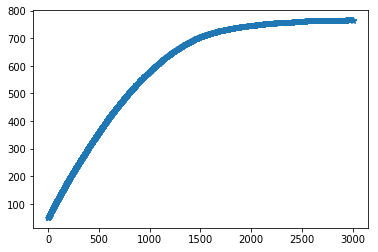

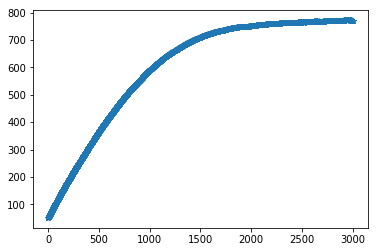

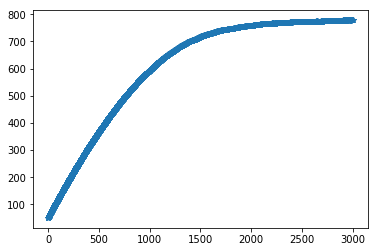

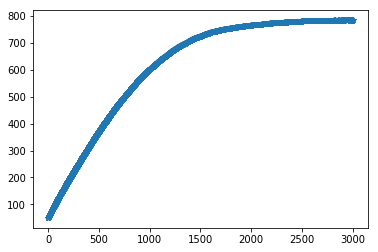

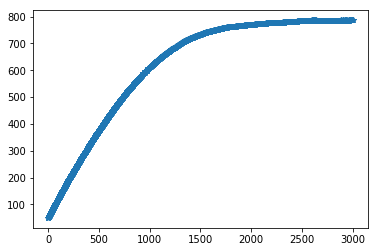

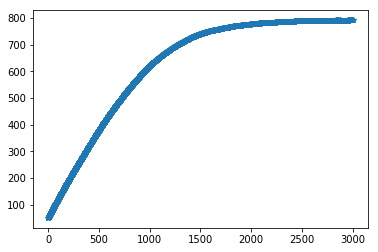

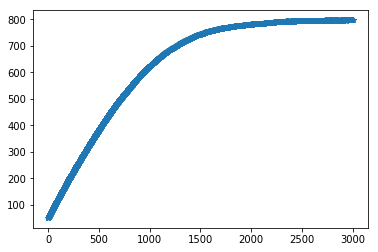

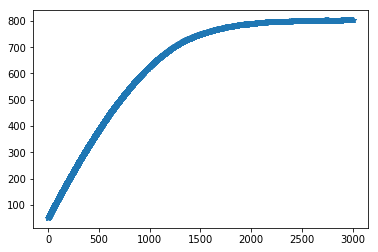

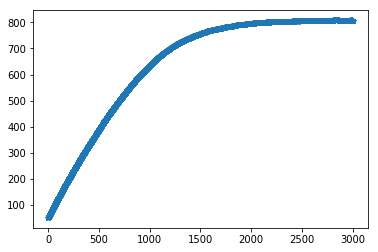

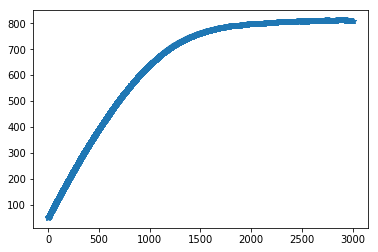

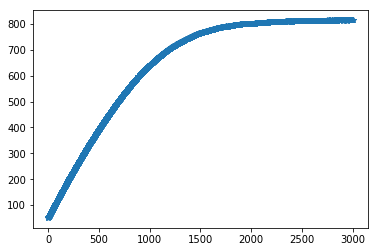

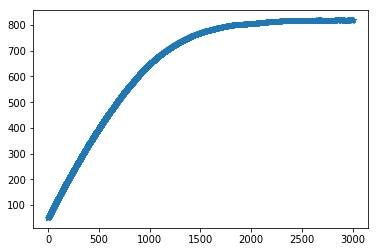

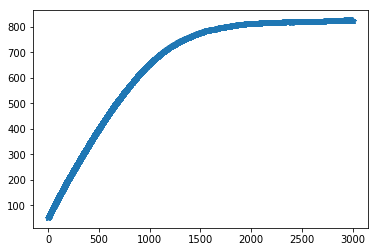

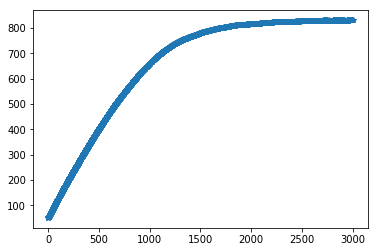

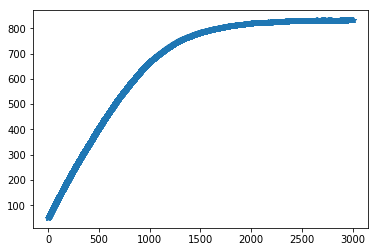

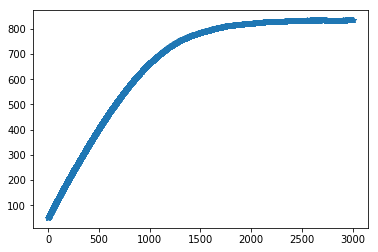

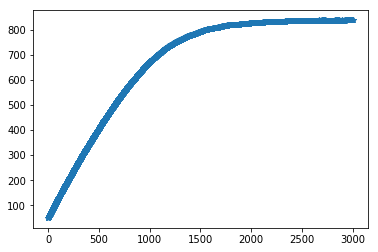

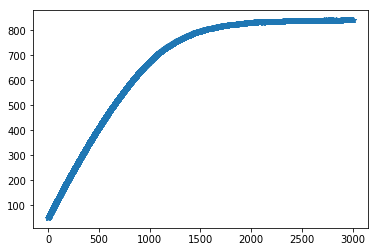

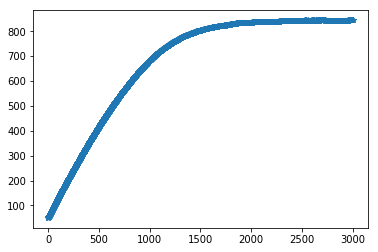

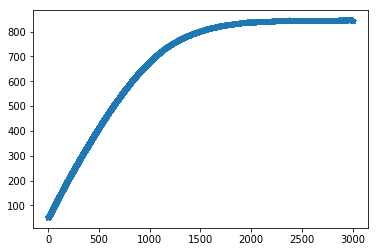

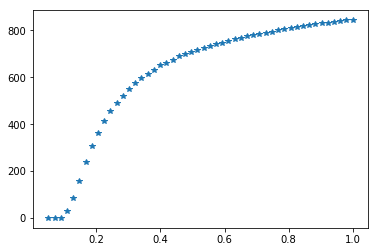

In [26]:
lambda_mean_list = np.loadtxt("I_mean_netA_0_1.gz")
lambdas = np.linspace(0.05,1, 50)
I_final=[]

for i in lambda_mean_list:
    plt.plot(i, "*")
    plt.show()
    
    I_temp=i[-500:]
    I_final.append(I_temp.mean())

plt.plot(lambdas,I_final,"*")


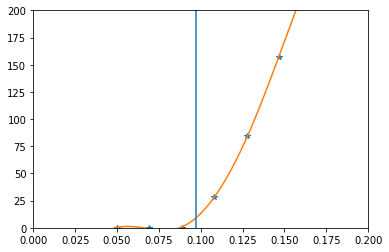

In [41]:
from scipy.interpolate import UnivariateSpline as USpl

fit = USpl(x=lambdas, y=I_final)
x = np.linspace(0,1,1000)
predict = fit(x)

plt.plot(lambdas,I_final,"*")
plt.plot(x, predict)
plt.xlim(0,0.2)
plt.ylim(0,200)

plt.axvline(0.0971628449280995)


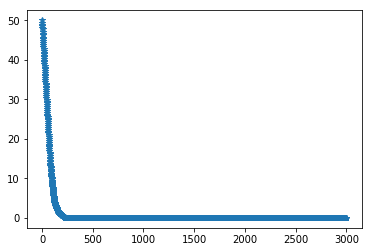

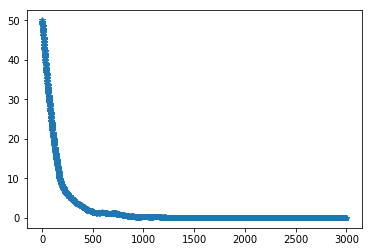

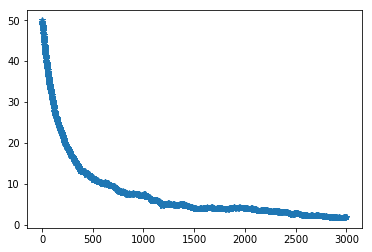

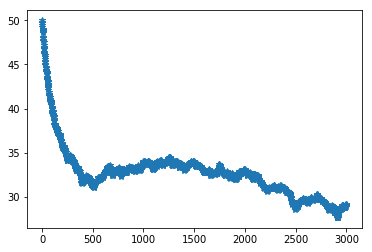

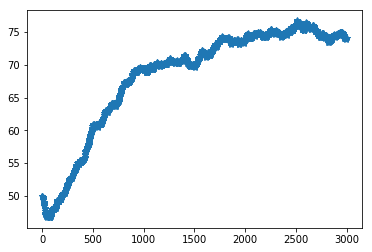

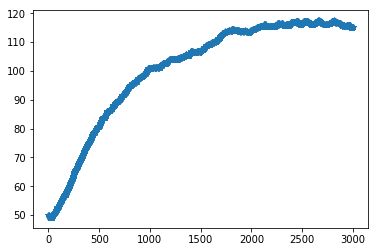

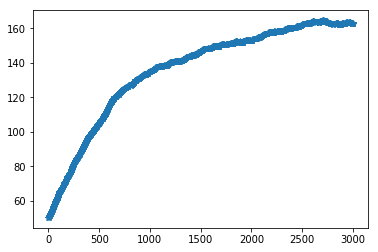

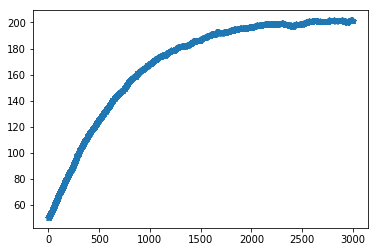

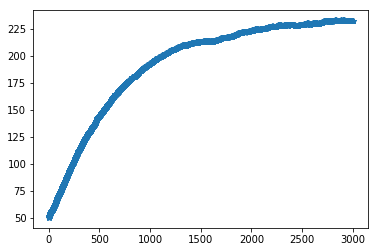

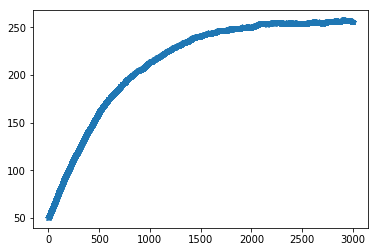

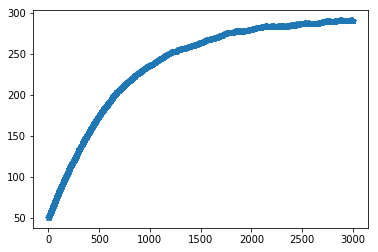

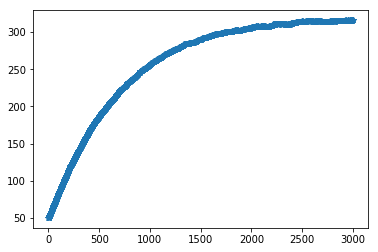

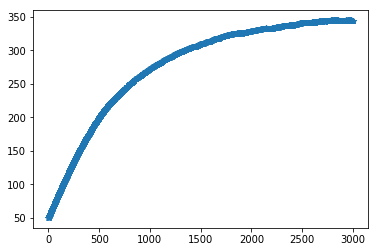

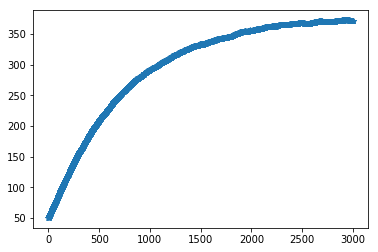

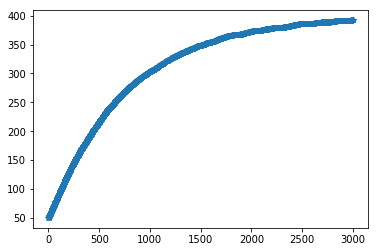

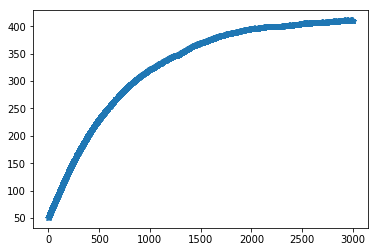

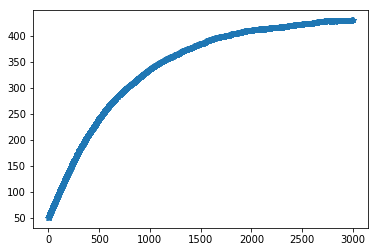

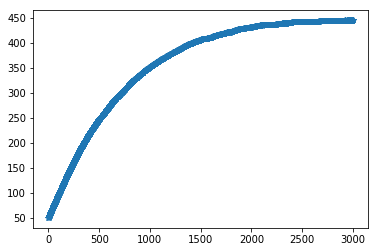

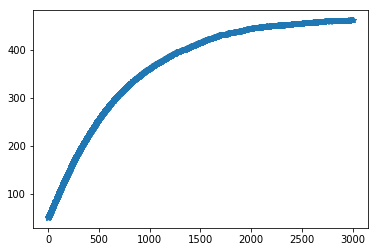

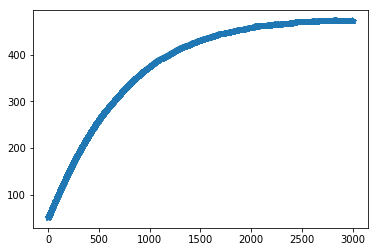

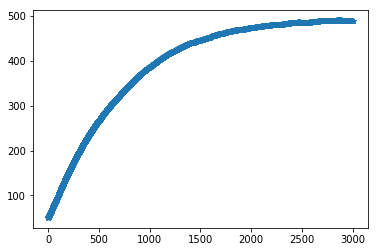

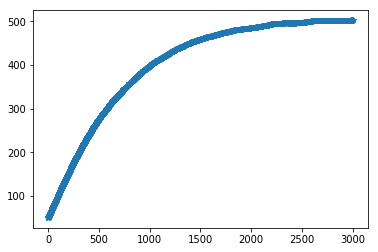

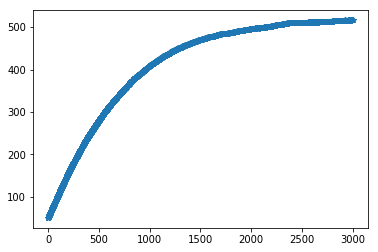

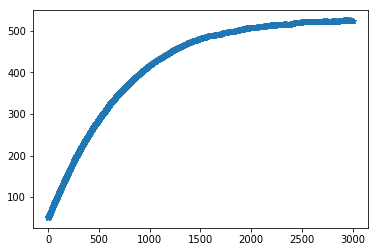

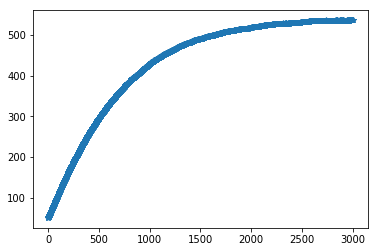

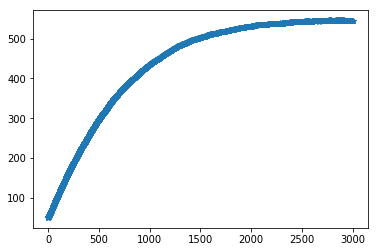

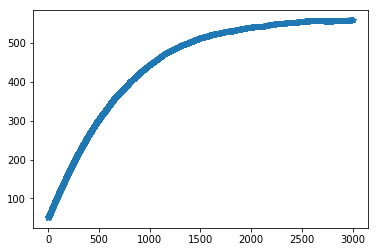

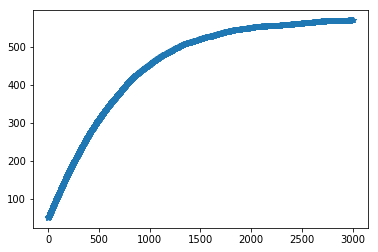

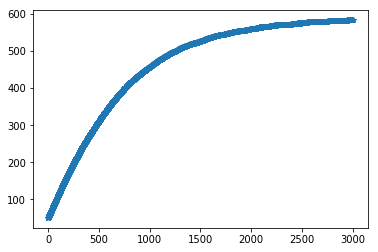

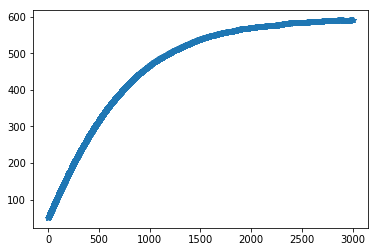

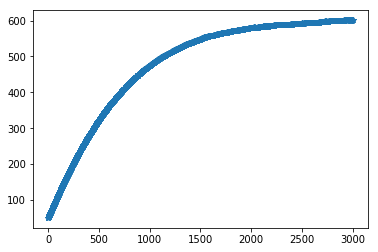

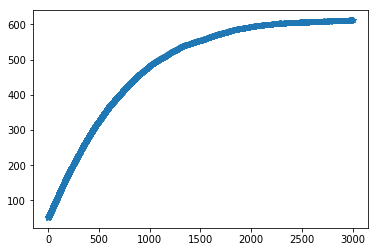

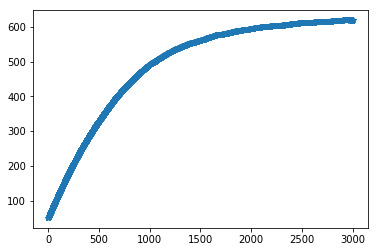

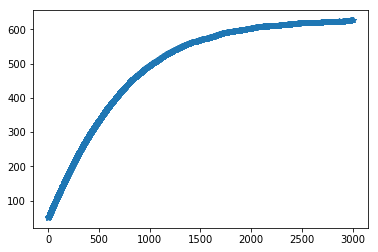

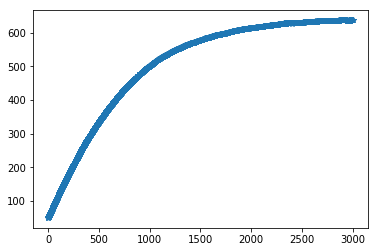

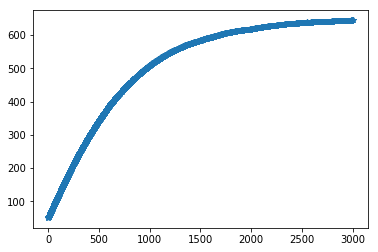

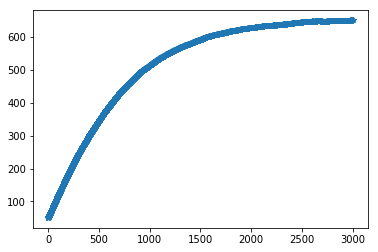

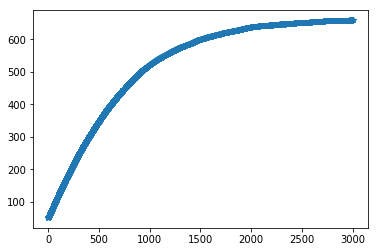

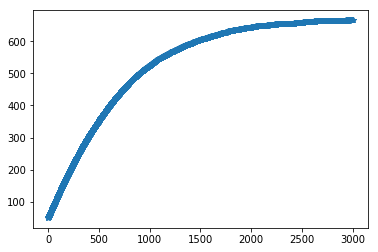

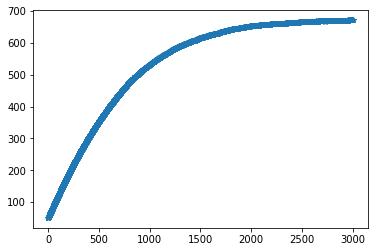

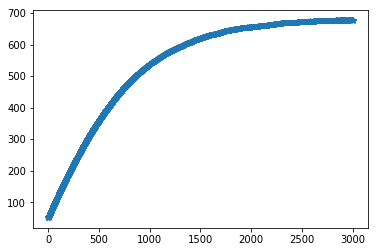

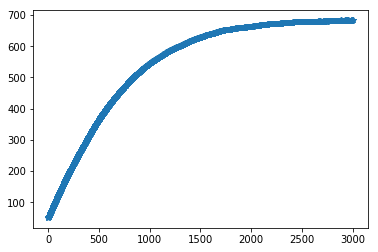

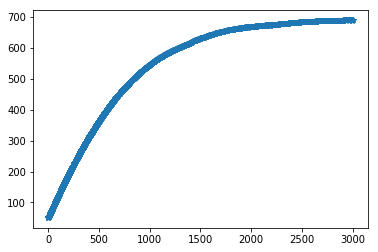

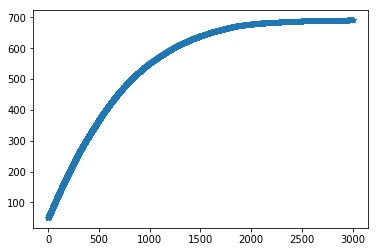

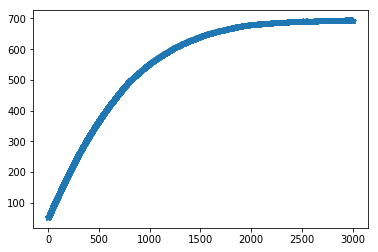

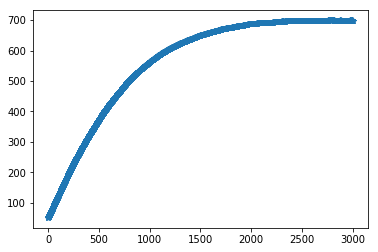

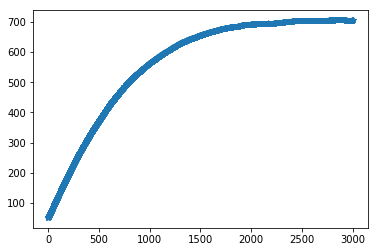

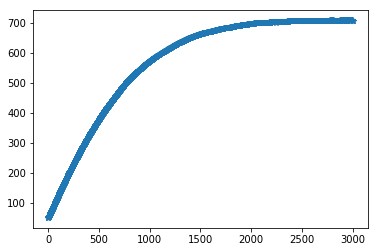

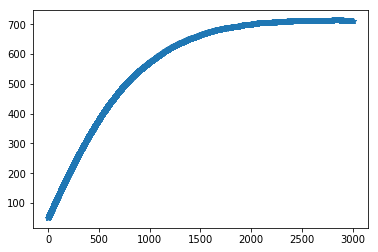

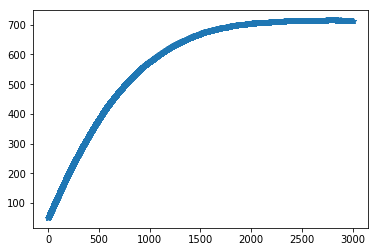

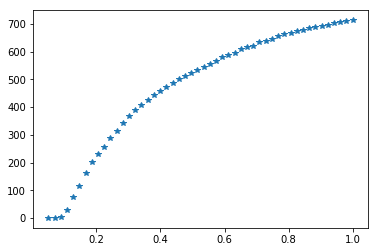

In [18]:
lambda_mean_list = np.loadtxt("I_mean_netB_0_1.gz")
lambdas = np.linspace(0.05,1, 50)
I_final=[]

for i in lambda_mean_list:
    plt.plot(i, "*")
    plt.show()
    
    I_temp=i[-500:]
    I_final.append(I_temp.mean())

plt.plot(lambdas,I_final,"*")

************ lambda = 0.05 ************


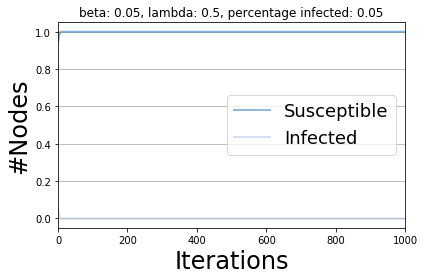

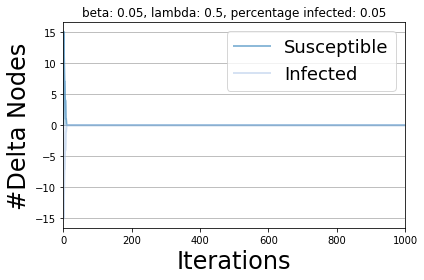

************ lambda = 0.05789473684210527 ************


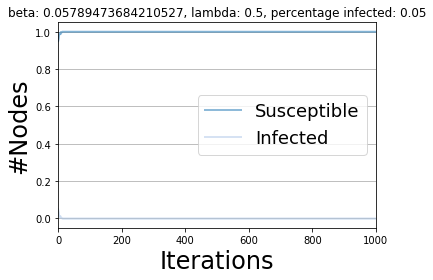

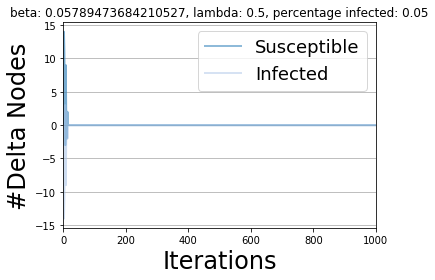

************ lambda = 0.06578947368421054 ************


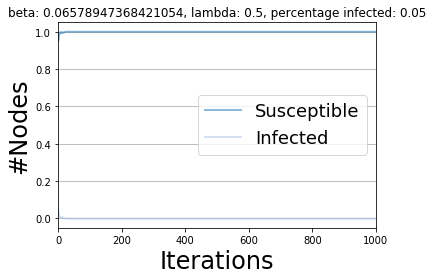

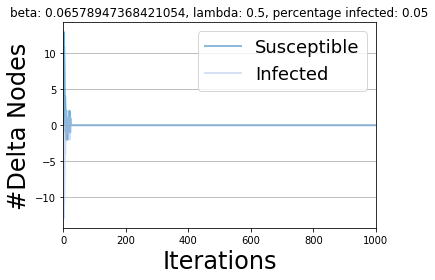

************ lambda = 0.0736842105263158 ************


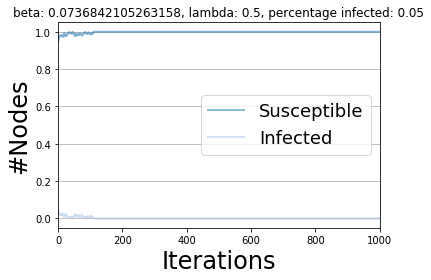

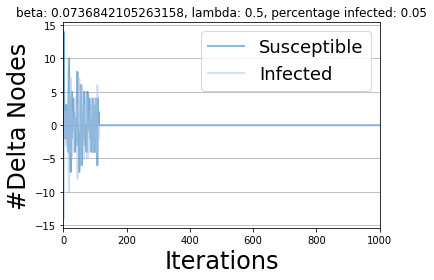

************ lambda = 0.08157894736842106 ************


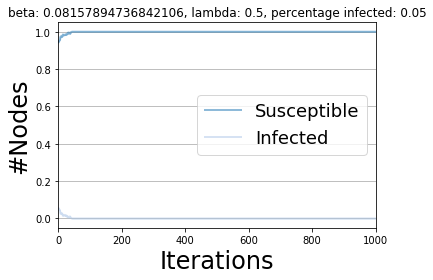

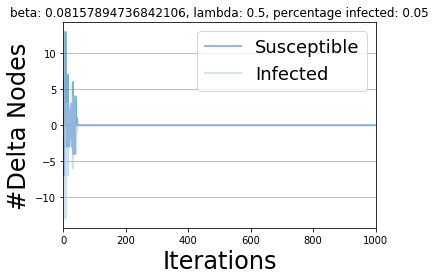

************ lambda = 0.08947368421052633 ************


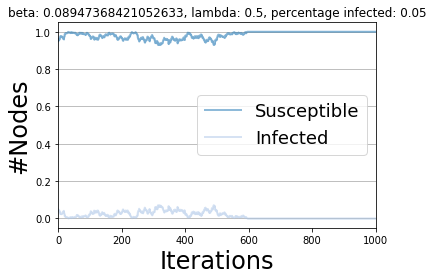

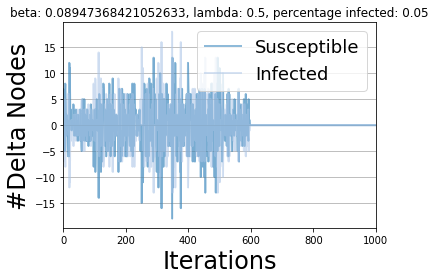

************ lambda = 0.09736842105263159 ************


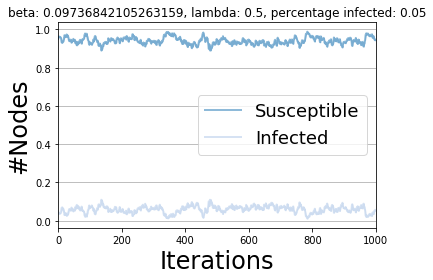

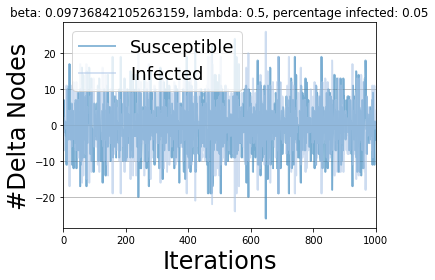

************ lambda = 0.10526315789473686 ************


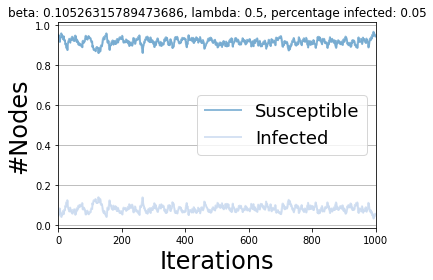

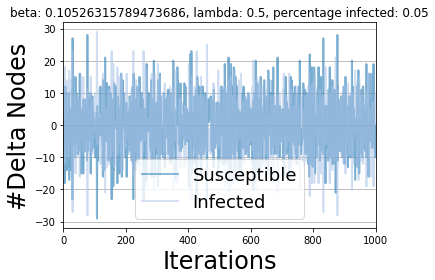

************ lambda = 0.11315789473684212 ************


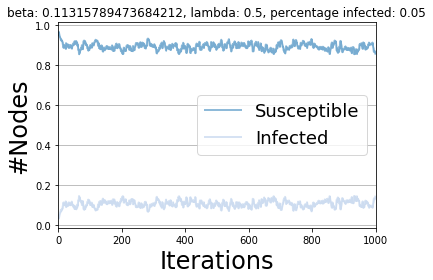

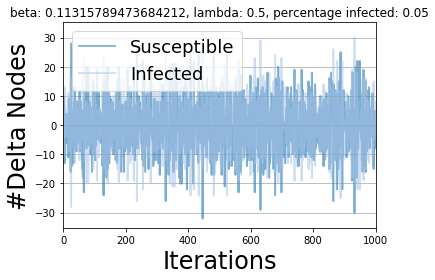

************ lambda = 0.12105263157894738 ************


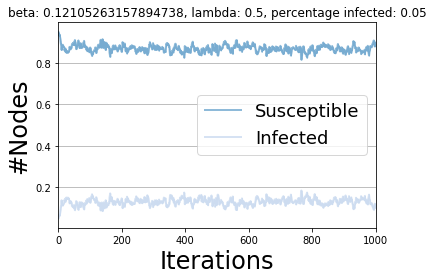

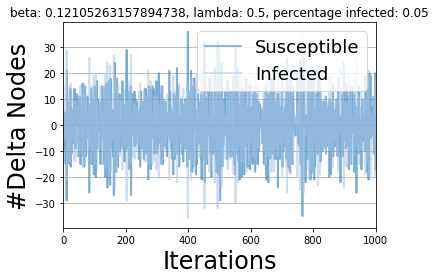

************ lambda = 0.12894736842105264 ************


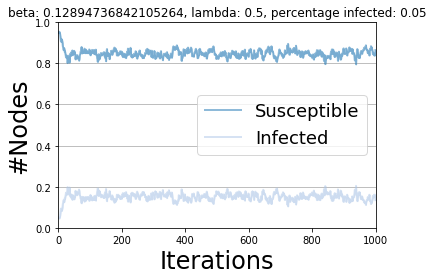

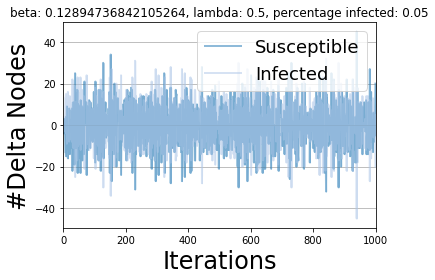

************ lambda = 0.13684210526315793 ************


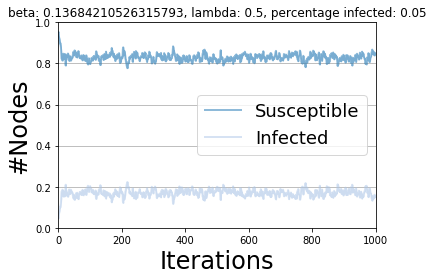

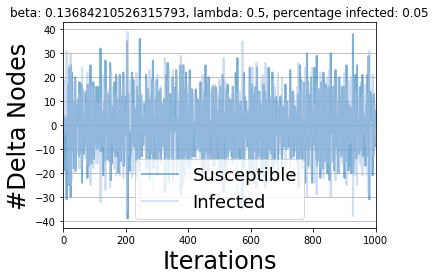

************ lambda = 0.14473684210526316 ************


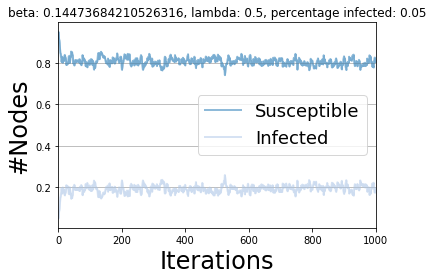

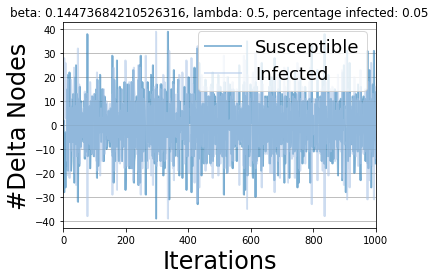

************ lambda = 0.15263157894736845 ************


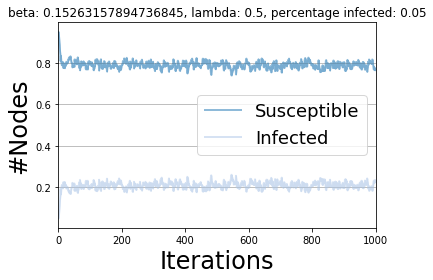

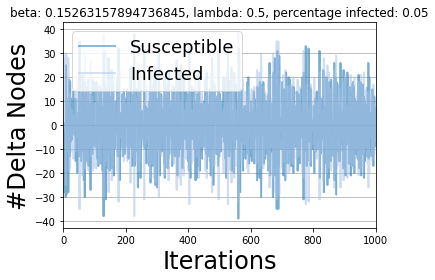

************ lambda = 0.1605263157894737 ************


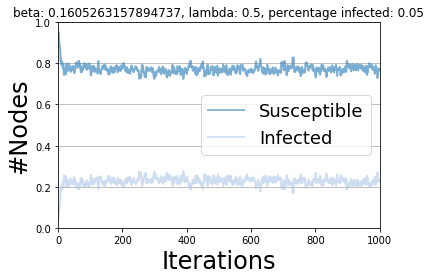

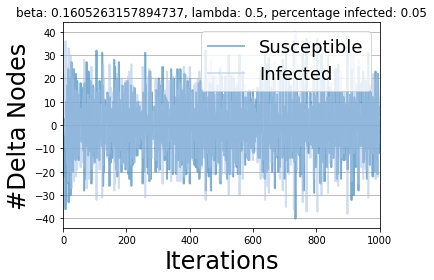

************ lambda = 0.16842105263157897 ************


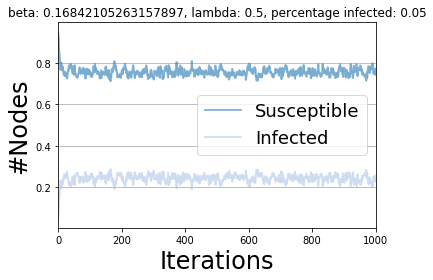

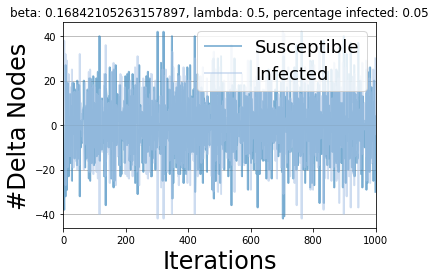

************ lambda = 0.17631578947368426 ************


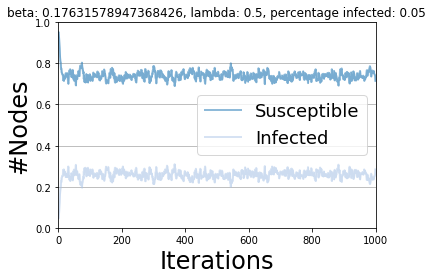

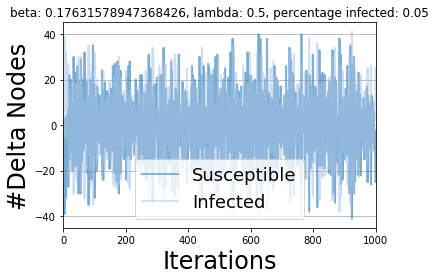

************ lambda = 0.1842105263157895 ************


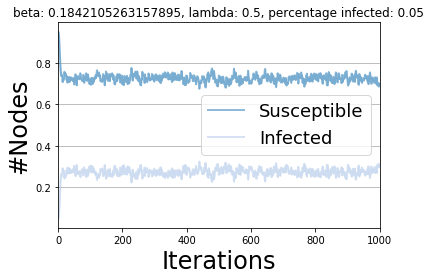

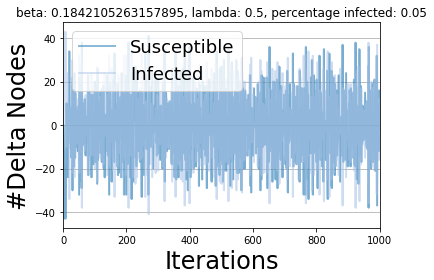

************ lambda = 0.19210526315789478 ************


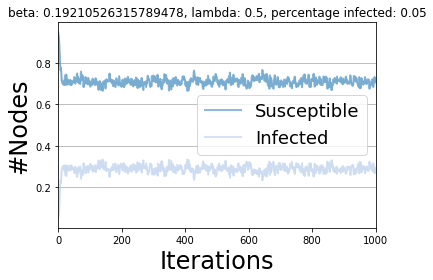

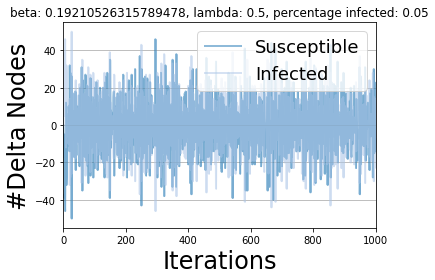

************ lambda = 0.2 ************


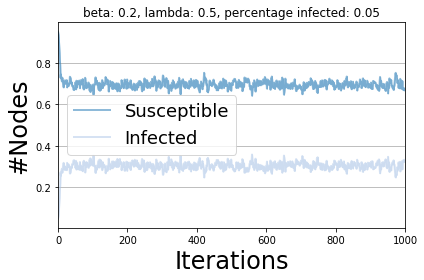

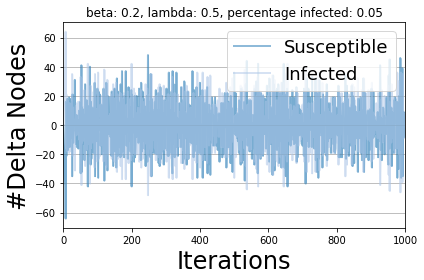

In [55]:
# https://ndlib.readthedocs.io/en/latest/index.html#
import ndlib.models.epidemics.SISModel as sis
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

net = NetB
it = 1000
lamb   = np.linspace(0.05, 0.2, 20)
for l in lamb:
    print("************ lambda =", l, "************")
    model = sis.SISModel(net)
    config = mc.Configuration()
    config.add_model_parameter("beta", l)    # infection probability
    config.add_model_parameter("lambda", mu) # recovery  probability
    config.add_model_parameter("percentage_infected", 0.05) # % of infected
    model.set_initial_status(config)

    # Simulation
    iterations = model.iteration_bunch(it)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()
    plt.show()


## Task 3
Characterize the two networks in terms of their connectivity, degree distribution, page-rank distribution, clustering coefficient. Comment the results at the light of point 2 (e.g. how structural properties of the networks and results of the epidemic dynamics are related?)

In [ ]:
'''connected component'''
print("number of connected component:")
print("Network A: ",nx.number_connected_components(NetA))
print("Network B: ",nx.number_connected_components(NetB))

In [ ]:
'''connectivity'''
print("Network A: ",nx.edge_connectivity(NetA))
print("Network B: ",nx.edge_connectivity(NetB))

In [ ]:
'''node degree'''
print("Network A: ")
node_deg = NetA.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

'''node degree'''
print("Network B: ")
node_deg = NetB.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

In [ ]:
'''pagerank'''
print("Network A: ")
pagerankA=nx.pagerank(NetA).values()

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankA, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

print("Network B: ")
pagerankB=nx.pagerank(NetB).values()

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankB, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

In [ ]:
'''clustering coefficient'''
cluster_coeff = nx.clustering(NetA)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

cluster_coeff = nx.clustering(NetB)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

## Task 5

Plot the the early stages of infected for the 100 locations. Assuming that the disease spreading can be approximated by a SIR dynamics, use the method described in https://towardsdatascience.com/infectionmodeling-part-1-87e74645568a to estimate the parameters of the SIR model. Will the chicken pox outbreack become viral?

In [44]:
dataset = pd.read_csv("./cases_100locations_first77days.txt", sep=" ")
dataset

,"#location_id,","days,","frac_S,","frac_I,",frac_R
0,1,0,0.989,0.011,0.000
1,1,1,0.988,0.012,0.000
2,1,2,0.986,0.014,0.000
3,1,3,0.986,0.014,0.000
4,1,4,0.985,0.014,0.001
5,1,5,0.985,0.014,0.001
6,1,6,0.984,0.015,0.001
7,1,7,0.983,0.016,0.001
8,1,8,0.980,0.019,0.001
9,1,9,0.976,0.023,0.001


In [45]:
dataset.describe()

,"#location_id,","days,","frac_S,","frac_I,",frac_R
count,7700.000000,7700.000000,7700.000000,7700.000000,7700.000000
mean,50.500000,38.000000,0.714588,0.235723,0.049689
std,28.867945,22.227554,0.240246,0.188031,0.054316
min,1.000000,0.000000,0.167000,0.007000,0.000000
25%,25.750000,19.000000,0.509000,0.058000,0.006000
50%,50.500000,38.000000,0.787500,0.186000,0.026000
75%,75.250000,57.000000,0.936000,0.408000,0.082000
max,100.000000,76.000000,0.993000,0.636000,0.229000


In [46]:
# x=giorni
# y=frac_I
# color=location

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000221C430D6A8> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 432x288 with 1 Axes>